### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns = ["EIN","NAME"],inplace = True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
counts = application_df.nunique()
counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

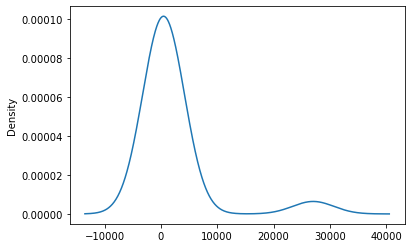

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C6100        1
C1370        1
C5200        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

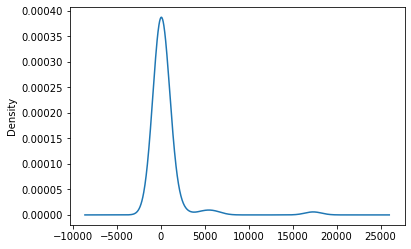

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 7,621
Trainable params: 7,621
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


In [19]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   32/25724 [..............................] - ETA: 3:40 - loss: 32096.1738 - acc: 0.4062
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   96/25724 [..............................] - ETA: 1:33 - loss: 14530.0982 - acc: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  160/25724 [..............................] - ETA: 1:05 - loss: 10871.5476 - acc: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  224/25724 [..............................] - ETA: 53s - loss: 7870.1333 - acc: 0.4777  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  288/25724 [..............................] - ETA: 46s - loss: 31628.0791 - acc: 0.4792
Epoch 00001: saving m

 2560/25724 [=>............................] - ETA: 27s - loss: 20589.5483 - acc: 0.4773
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2624/25724 [==>...........................] - ETA: 27s - loss: 21431.4326 - acc: 0.4745
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2688/25724 [==>...........................] - ETA: 27s - loss: 21061.4412 - acc: 0.4743
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2752/25724 [==>...........................] - ETA: 27s - loss: 21326.5329 - acc: 0.4731
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2816/25724 [==>...........................] - ETA: 27s - loss: 70344.8530 - acc: 0.4709
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoi

 5120/25724 [====>.........................] - ETA: 23s - loss: 48775.4514 - acc: 0.4957
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5184/25724 [=====>........................] - ETA: 23s - loss: 48190.3990 - acc: 0.4969
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5248/25724 [=====>........................] - ETA: 23s - loss: 47755.3094 - acc: 0.4966
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5312/25724 [=====>........................] - ETA: 23s - loss: 47182.8304 - acc: 0.4987
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5376/25724 [=====>........................] - ETA: 23s - loss: 46624.4779 - acc: 0.5002
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoi


Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7616/25724 [=======>......................] - ETA: 21s - loss: 70351.6808 - acc: 0.4965
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7680/25724 [=======>......................] - ETA: 21s - loss: 69859.8917 - acc: 0.4965
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7744/25724 [========>.....................] - ETA: 21s - loss: 69359.8190 - acc: 0.4961
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7808/25724 [========>.....................] - ETA: 21s - loss: 68912.8381 - acc: 0.4953
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7872/25724 [========>.....................] - ETA: 21s - loss: 68382.6231 - acc: 0.4950
Epoch 00001: saving model to checkpoi

10176/25724 [==========>...................] - ETA: 17s - loss: 65722.2548 - acc: 0.4884
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10240/25724 [==========>...................] - ETA: 17s - loss: 65311.5894 - acc: 0.4886
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10304/25724 [===========>..................] - ETA: 17s - loss: 64920.8379 - acc: 0.4883
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10368/25724 [===========>..................] - ETA: 17s - loss: 64527.8862 - acc: 0.4883
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10432/25724 [===========>..................] - ETA: 17s - loss: 64135.0610 - acc: 0.4886
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoi

12736/25724 [=============>................] - ETA: 14s - loss: 53096.4229 - acc: 0.4914
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12800/25724 [=============>................] - ETA: 14s - loss: 52874.1002 - acc: 0.4913
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12864/25724 [==============>...............] - ETA: 14s - loss: 52624.8570 - acc: 0.4914
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12928/25724 [==============>...............] - ETA: 14s - loss: 55773.3428 - acc: 0.4911
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12992/25724 [==============>...............] - ETA: 14s - loss: 55502.3483 - acc: 0.4908
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoi

15296/25724 [================>.............] - ETA: 11s - loss: 48214.6131 - acc: 0.4878
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15360/25724 [================>.............] - ETA: 11s - loss: 48027.1574 - acc: 0.4877
Epoch 00001: saving model to checkpoints/weights.01.hdf5
15392/25724 [================>.............] - ETA: 11s - loss: 47927.5908 - acc: 0.4877
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15456/25724 [=================>............] - ETA: 11s - loss: 47730.1369 - acc: 0.4884
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15520/25724 [=================>............] - ETA: 11s - loss: 47678.4376 - acc: 0.4883
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15584/25724 [=================>.......

17888/25724 [===================>..........] - ETA: 8s - loss: 41833.7788 - acc: 0.4901
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17952/25724 [===================>..........] - ETA: 8s - loss: 41684.9687 - acc: 0.4900
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
18016/25724 [====================>.........] - ETA: 8s - loss: 41537.6968 - acc: 0.4900
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
18080/25724 [====================>.........] - ETA: 8s - loss: 41391.8013 - acc: 0.4897
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
18144/25724 [====================>.........] - ETA: 8s - loss: 41259.3247 - acc: 0.4899
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/w

20448/25724 [======================>.......] - ETA: 5s - loss: 44851.2089 - acc: 0.4946
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20512/25724 [======================>.......] - ETA: 5s - loss: 46506.7489 - acc: 0.4948
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20576/25724 [======================>.......] - ETA: 5s - loss: 46364.3761 - acc: 0.4950
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20640/25724 [=======================>......] - ETA: 5s - loss: 46223.6585 - acc: 0.4950
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20704/25724 [=======================>......] - ETA: 5s - loss: 46081.1812 - acc: 0.4949
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/w

23008/25724 [=========================>....] - ETA: 2s - loss: 44047.0559 - acc: 0.4929
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23072/25724 [=========================>....] - ETA: 2s - loss: 43945.7194 - acc: 0.4930
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23136/25724 [=========================>....] - ETA: 2s - loss: 44118.0602 - acc: 0.4930
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23200/25724 [==========================>...] - ETA: 2s - loss: 44083.2879 - acc: 0.4928
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23264/25724 [==========================>...] - ETA: 2s - loss: 43966.8412 - acc: 0.4926
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/w

25568/25724 [============================>.] - ETA: 0s - loss: 65958.0362 - acc: 0.4961
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 65820.6141 - acc: 0.4964
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 66092.9385 - acc: 0.4963
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 28s 1ms/sample - loss: 66026.6751 - acc: 0.4964
Epoch 2/100

Epoch 00002: saving model to checkpoints/weights.02.hdf5
   32/25724 [..............................] - ETA: 20s - loss: 565.7484 - acc: 0.5625
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
   96/25724 [..............................] - ETA: 27s - loss: 715.4520 - acc: 0.

 2368/25724 [=>............................] - ETA: 27s - loss: 218022.5775 - acc: 0.4983
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2432/25724 [=>............................] - ETA: 27s - loss: 212758.8106 - acc: 0.4971
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2464/25724 [=>............................] - ETA: 27s - loss: 210011.9249 - acc: 0.4951
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2496/25724 [=>............................] - ETA: 27s - loss: 207360.2281 - acc: 0.4944
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2560/25724 [=>............................] - ETA: 27s - loss: 202188.0435 - acc: 0.4945
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2624/25724 [==>...........................] - ETA: 27s - loss: 197295.2659 - acc: 0.4962
E

 4768/25724 [====>.........................] - ETA: 27s - loss: 109766.4566 - acc: 0.4843
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4832/25724 [====>.........................] - ETA: 27s - loss: 108312.7803 - acc: 0.4849
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4896/25724 [====>.........................] - ETA: 27s - loss: 106897.8280 - acc: 0.4851
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4960/25724 [====>.........................] - ETA: 27s - loss: 105518.6428 - acc: 0.4865
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 5024/25724 [====>.........................] - ETA: 27s - loss: 104175.7280 - acc: 0.4867
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to che

 7264/25724 [=======>......................] - ETA: 25s - loss: 72519.8323 - acc: 0.4901
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 7296/25724 [=======>......................] - ETA: 25s - loss: 72272.1298 - acc: 0.4903
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 7360/25724 [=======>......................] - ETA: 24s - loss: 71652.1450 - acc: 0.4901
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 7424/25724 [=======>......................] - ETA: 24s - loss: 71035.0546 - acc: 0.4912
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 7488/25724 [=======>......................] - ETA: 24s - loss: 70759.5103 - acc: 0.4913
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 7552/25724 [=======>.................

 9760/25724 [==========>...................] - ETA: 21s - loss: 60190.8844 - acc: 0.4976
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9824/25724 [==========>...................] - ETA: 20s - loss: 59810.2442 - acc: 0.4980
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9888/25724 [==========>...................] - ETA: 20s - loss: 59437.6975 - acc: 0.4985
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9952/25724 [==========>...................] - ETA: 20s - loss: 59095.4001 - acc: 0.4989
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
10016/25724 [==========>...................] - ETA: 20s - loss: 58720.0778 - acc: 0.4991
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoi

12320/25724 [=============>................] - ETA: 17s - loss: 49646.5533 - acc: 0.5041
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12384/25724 [=============>................] - ETA: 17s - loss: 49392.6965 - acc: 0.5045
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12448/25724 [=============>................] - ETA: 17s - loss: 49901.6071 - acc: 0.5047
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12512/25724 [=============>................] - ETA: 17s - loss: 49660.8289 - acc: 0.5049
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12576/25724 [=============>................] - ETA: 16s - loss: 49415.6975 - acc: 0.5049
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoi

14912/25724 [================>.............] - ETA: 13s - loss: 42003.4803 - acc: 0.4992
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
14976/25724 [================>.............] - ETA: 13s - loss: 41824.1975 - acc: 0.4993
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15040/25724 [================>.............] - ETA: 13s - loss: 41646.4255 - acc: 0.4991
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15104/25724 [================>.............] - ETA: 13s - loss: 41470.6042 - acc: 0.4990
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15168/25724 [================>.............] - ETA: 13s - loss: 41295.7421 - acc: 0.4991
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoi

17504/25724 [===================>..........] - ETA: 10s - loss: 35807.8941 - acc: 0.5046
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
17568/25724 [===================>..........] - ETA: 10s - loss: 35678.5315 - acc: 0.5047
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
17632/25724 [===================>..........] - ETA: 10s - loss: 35549.0565 - acc: 0.5051
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
17696/25724 [===================>..........] - ETA: 10s - loss: 35420.6292 - acc: 0.5050
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
17760/25724 [===================>..........] - ETA: 10s - loss: 35293.4334 - acc: 0.5052
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoi

20064/25724 [======================>.......] - ETA: 7s - loss: 31465.2267 - acc: 0.5086
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20128/25724 [======================>.......] - ETA: 7s - loss: 31412.4245 - acc: 0.5087
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20192/25724 [======================>.......] - ETA: 6s - loss: 31431.9033 - acc: 0.5088
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20256/25724 [======================>.......] - ETA: 6s - loss: 31420.3713 - acc: 0.5087
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20320/25724 [======================>.......] - ETA: 6s - loss: 31377.2889 - acc: 0.5088
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/w

22624/25724 [=========================>....] - ETA: 3s - loss: 30378.2551 - acc: 0.5047
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22688/25724 [=========================>....] - ETA: 3s - loss: 30300.4933 - acc: 0.5047
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22752/25724 [=========================>....] - ETA: 3s - loss: 30226.9676 - acc: 0.5043
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22816/25724 [=========================>....] - ETA: 3s - loss: 30167.2857 - acc: 0.5043
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22880/25724 [=========================>....] - ETA: 3s - loss: 30114.1586 - acc: 0.5044
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/w

25184/25724 [============================>.] - ETA: 0s - loss: 43684.9153 - acc: 0.5036
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 43574.7329 - acc: 0.5037
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 43537.3889 - acc: 0.5039
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 43428.9582 - acc: 0.5036
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 43320.3968 - acc: 0.5033
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/w

 2016/25724 [=>............................] - ETA: 28s - loss: 302989.7655 - acc: 0.5144
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2080/25724 [=>............................] - ETA: 28s - loss: 293804.4469 - acc: 0.5173
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2144/25724 [=>............................] - ETA: 28s - loss: 285185.2695 - acc: 0.5187
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2208/25724 [=>............................] - ETA: 28s - loss: 277427.5815 - acc: 0.5226
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2272/25724 [=>............................] - ETA: 28s - loss: 271859.6385 - acc: 0.5216
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to che

 4544/25724 [====>.........................] - ETA: 25s - loss: 145484.6654 - acc: 0.4967
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4608/25724 [====>.........................] - ETA: 25s - loss: 143478.8721 - acc: 0.4950
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4672/25724 [====>.........................] - ETA: 25s - loss: 142230.7244 - acc: 0.4949
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4736/25724 [====>.........................] - ETA: 25s - loss: 143959.0242 - acc: 0.4943
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4800/25724 [====>.........................] - ETA: 25s - loss: 142050.0246 - acc: 0.4948
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to che

 7104/25724 [=======>......................] - ETA: 22s - loss: 97627.5780 - acc: 0.4965
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7168/25724 [=======>......................] - ETA: 22s - loss: 96757.5406 - acc: 0.4960
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7232/25724 [=======>......................] - ETA: 22s - loss: 95903.7277 - acc: 0.4961
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7296/25724 [=======>......................] - ETA: 22s - loss: 95062.9288 - acc: 0.4960
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7360/25724 [=======>......................] - ETA: 22s - loss: 94240.2406 - acc: 0.4966
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoi


Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9696/25724 [==========>...................] - ETA: 19s - loss: 73276.6725 - acc: 0.4954
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9760/25724 [==========>...................] - ETA: 19s - loss: 72802.4842 - acc: 0.4957
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9824/25724 [==========>...................] - ETA: 19s - loss: 72331.0289 - acc: 0.4958
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9888/25724 [==========>...................] - ETA: 18s - loss: 72241.5115 - acc: 0.4958
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9952/25724 [==========>...................] - ETA: 18s - loss: 71777.9050 - acc: 0.4966
Epoch 00003: saving model to checkpoi

12256/25724 [=============>................] - ETA: 15s - loss: 69646.9927 - acc: 0.4944
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12320/25724 [=============>................] - ETA: 15s - loss: 69303.5238 - acc: 0.4952
Epoch 00003: saving model to checkpoints/weights.03.hdf5
12352/25724 [=============>................] - ETA: 15s - loss: 69124.3967 - acc: 0.4957
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12416/25724 [=============>................] - ETA: 15s - loss: 68768.5744 - acc: 0.4963
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12480/25724 [=============>................] - ETA: 15s - loss: 68417.8294 - acc: 0.4960
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12544/25724 [=============>...........

14816/25724 [================>.............] - ETA: 13s - loss: 59080.8694 - acc: 0.5001
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
14880/25724 [================>.............] - ETA: 12s - loss: 58833.5207 - acc: 0.5001
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
14944/25724 [================>.............] - ETA: 12s - loss: 58602.5866 - acc: 0.5005
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15008/25724 [================>.............] - ETA: 12s - loss: 58353.3647 - acc: 0.5010
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15072/25724 [================>.............] - ETA: 12s - loss: 58108.0119 - acc: 0.5010
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoi

17312/25724 [===================>..........] - ETA: 10s - loss: 50935.6540 - acc: 0.4971
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
17376/25724 [===================>..........] - ETA: 10s - loss: 50749.1065 - acc: 0.4972
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
17440/25724 [===================>..........] - ETA: 10s - loss: 50564.0067 - acc: 0.4975
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
17504/25724 [===================>..........] - ETA: 10s - loss: 50379.9468 - acc: 0.4977
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
17568/25724 [===================>..........] - ETA: 9s - loss: 50196.5597 - acc: 0.4982 
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoi

19904/25724 [======================>.......] - ETA: 7s - loss: 44624.7090 - acc: 0.4994
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19968/25724 [======================>.......] - ETA: 7s - loss: 44498.5729 - acc: 0.4993
Epoch 00003: saving model to checkpoints/weights.03.hdf5
20000/25724 [======================>.......] - ETA: 6s - loss: 44429.4165 - acc: 0.4994
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
20064/25724 [======================>.......] - ETA: 6s - loss: 44289.5624 - acc: 0.4993
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
20128/25724 [======================>.......] - ETA: 6s - loss: 44179.2563 - acc: 0.4992
Epoch 00003: saving model to checkpoints/weights.03.hdf5
20160/25724 [======================>.......] - ETA: 6s - loss: 44109.3332 - acc: 0.4990
Epoch 00003: 

22400/25724 [=========================>....] - ETA: 4s - loss: 40901.2955 - acc: 0.4957
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 40802.0378 - acc: 0.4952
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 40686.7310 - acc: 0.4952
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22592/25724 [=========================>....] - ETA: 3s - loss: 40575.3721 - acc: 0.4949
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 40467.4727 - acc: 0.4949
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/w

24928/25724 [============================>.] - ETA: 0s - loss: 37885.7198 - acc: 0.4942
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 37797.4226 - acc: 0.4943
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 37749.4829 - acc: 0.4945
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 37659.5850 - acc: 0.4947
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 37564.1983 - acc: 0.4949
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25216/25724 [============================>.

 1696/25724 [>.............................] - ETA: 30s - loss: 121515.9795 - acc: 0.4906
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1760/25724 [=>............................] - ETA: 30s - loss: 118148.7580 - acc: 0.4898
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1824/25724 [=>............................] - ETA: 30s - loss: 114086.9169 - acc: 0.4907
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1888/25724 [=>............................] - ETA: 30s - loss: 110233.8892 - acc: 0.4931
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1952/25724 [=>............................] - ETA: 30s - loss: 156773.9164 - acc: 0.4908
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to che

 4256/25724 [===>..........................] - ETA: 25s - loss: 73498.7403 - acc: 0.4840
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4320/25724 [====>.........................] - ETA: 25s - loss: 72409.9885 - acc: 0.4854
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4384/25724 [====>.........................] - ETA: 25s - loss: 71353.8756 - acc: 0.4845
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4448/25724 [====>.........................] - ETA: 25s - loss: 70329.4667 - acc: 0.4872
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4512/25724 [====>.........................] - ETA: 25s - loss: 69332.8046 - acc: 0.4860
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoi

 6816/25724 [======>.......................] - ETA: 22s - loss: 47044.8629 - acc: 0.4875
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 6880/25724 [=======>......................] - ETA: 22s - loss: 46607.7958 - acc: 0.4879
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 6944/25724 [=======>......................] - ETA: 22s - loss: 46178.2954 - acc: 0.4888
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7008/25724 [=======>......................] - ETA: 22s - loss: 45756.8209 - acc: 0.4890
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7072/25724 [=======>......................] - ETA: 22s - loss: 45342.7924 - acc: 0.4891
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoi

 9408/25724 [=========>....................] - ETA: 19s - loss: 34155.6678 - acc: 0.4962
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9472/25724 [==========>...................] - ETA: 19s - loss: 33925.5887 - acc: 0.4968
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9536/25724 [==========>...................] - ETA: 19s - loss: 33711.9731 - acc: 0.4976
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9600/25724 [==========>...................] - ETA: 19s - loss: 33487.9384 - acc: 0.4977
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9664/25724 [==========>...................] - ETA: 19s - loss: 33266.2020 - acc: 0.4979
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoi

11936/25724 [============>.................] - ETA: 16s - loss: 27044.1190 - acc: 0.4962
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12000/25724 [============>.................] - ETA: 16s - loss: 26899.9232 - acc: 0.4963
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12064/25724 [=============>................] - ETA: 16s - loss: 26757.2681 - acc: 0.4964
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12128/25724 [=============>................] - ETA: 16s - loss: 26616.4356 - acc: 0.4964
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12192/25724 [=============>................] - ETA: 16s - loss: 26476.8909 - acc: 0.4964
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoi

14496/25724 [===============>..............] - ETA: 13s - loss: 23379.2739 - acc: 0.5005
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
14560/25724 [===============>..............] - ETA: 13s - loss: 23295.9079 - acc: 0.5007
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
14624/25724 [================>.............] - ETA: 13s - loss: 23197.1165 - acc: 0.5008
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
14688/25724 [================>.............] - ETA: 13s - loss: 23096.9709 - acc: 0.5008
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
14752/25724 [================>.............] - ETA: 12s - loss: 23002.5794 - acc: 0.5005
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoi

17056/25724 [==================>...........] - ETA: 10s - loss: 22150.4657 - acc: 0.4977
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
17120/25724 [==================>...........] - ETA: 10s - loss: 22075.0481 - acc: 0.4979
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
17184/25724 [===================>..........] - ETA: 10s - loss: 21994.9710 - acc: 0.4980
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
17248/25724 [===================>..........] - ETA: 9s - loss: 21930.3104 - acc: 0.4981 
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
17312/25724 [===================>..........] - ETA: 9s - loss: 21851.4264 - acc: 0.4983
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoin

19648/25724 [=====================>........] - ETA: 7s - loss: 24719.5252 - acc: 0.5022
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19712/25724 [=====================>........] - ETA: 7s - loss: 24716.1673 - acc: 0.5019
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19776/25724 [======================>.......] - ETA: 7s - loss: 24638.2883 - acc: 0.5021
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19840/25724 [======================>.......] - ETA: 6s - loss: 25593.4685 - acc: 0.5022
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 25530.5729 - acc: 0.5022
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/w

22208/25724 [========================>.....] - ETA: 4s - loss: 23868.0693 - acc: 0.4994
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22272/25724 [========================>.....] - ETA: 4s - loss: 23810.7800 - acc: 0.4992
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22336/25724 [=========================>....] - ETA: 4s - loss: 23743.1842 - acc: 0.4991
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22400/25724 [=========================>....] - ETA: 3s - loss: 23676.5941 - acc: 0.4989
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 23609.7957 - acc: 0.4988
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/w

24768/25724 [===========================>..] - ETA: 1s - loss: 21605.3643 - acc: 0.4982
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
24832/25724 [===========================>..] - ETA: 1s - loss: 21549.9565 - acc: 0.4982
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 21494.6409 - acc: 0.4986
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 21446.1056 - acc: 0.4990
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 21391.2755 - acc: 0.4992
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/w

 1568/25724 [>.............................] - ETA: 28s - loss: 682.2538 - acc: 0.5325
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1632/25724 [>.............................] - ETA: 28s - loss: 658.9094 - acc: 0.5325
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1696/25724 [>.............................] - ETA: 28s - loss: 638.1880 - acc: 0.5354
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1760/25724 [=>............................] - ETA: 28s - loss: 617.0761 - acc: 0.5364
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1824/25724 [=>............................] - ETA: 27s - loss: 662.2623 - acc: 0.5384
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weight

 4128/25724 [===>..........................] - ETA: 23s - loss: 8118.8052 - acc: 0.5015
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4192/25724 [===>..........................] - ETA: 23s - loss: 8169.3143 - acc: 0.5017
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4256/25724 [===>..........................] - ETA: 23s - loss: 8049.7900 - acc: 0.5014
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4320/25724 [====>.........................] - ETA: 23s - loss: 8598.6994 - acc: 0.5002
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4384/25724 [====>.........................] - ETA: 23s - loss: 8479.6810 - acc: 0.4995
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/w

 6688/25724 [======>.......................] - ETA: 21s - loss: 25797.2961 - acc: 0.4882
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6752/25724 [======>.......................] - ETA: 20s - loss: 25581.6408 - acc: 0.4880
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6816/25724 [======>.......................] - ETA: 20s - loss: 25378.6371 - acc: 0.4869
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6880/25724 [=======>......................] - ETA: 20s - loss: 25154.5575 - acc: 0.4869
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6944/25724 [=======>......................] - ETA: 20s - loss: 25087.1752 - acc: 0.4862
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoi


Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9280/25724 [=========>....................] - ETA: 18s - loss: 42325.1643 - acc: 0.4869
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9344/25724 [=========>....................] - ETA: 18s - loss: 42081.2021 - acc: 0.4869
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9408/25724 [=========>....................] - ETA: 18s - loss: 41797.1806 - acc: 0.4872
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9472/25724 [==========>...................] - ETA: 18s - loss: 41545.3844 - acc: 0.4875
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9536/25724 [==========>...................] - ETA: 18s - loss: 41272.3539 - acc: 0.4873
Epoch 00005: saving model to checkpoi

11808/25724 [============>.................] - ETA: 16s - loss: 61331.1891 - acc: 0.4811
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
11872/25724 [============>.................] - ETA: 16s - loss: 61291.8442 - acc: 0.4814
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
11936/25724 [============>.................] - ETA: 16s - loss: 60968.3456 - acc: 0.4817
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
12000/25724 [============>.................] - ETA: 16s - loss: 60651.2622 - acc: 0.4818
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
12064/25724 [=============>................] - ETA: 16s - loss: 60332.3982 - acc: 0.4819
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoi

14368/25724 [===============>..............] - ETA: 13s - loss: 54169.8766 - acc: 0.4894
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14432/25724 [===============>..............] - ETA: 13s - loss: 53984.1070 - acc: 0.4891
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14496/25724 [===============>..............] - ETA: 13s - loss: 53800.2304 - acc: 0.4894
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14560/25724 [===============>..............] - ETA: 13s - loss: 53564.3683 - acc: 0.4895
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14624/25724 [================>.............] - ETA: 13s - loss: 53338.3981 - acc: 0.4899
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoi

16928/25724 [==================>...........] - ETA: 10s - loss: 47843.8897 - acc: 0.4900
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
16992/25724 [==================>...........] - ETA: 10s - loss: 47666.1119 - acc: 0.4899
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17056/25724 [==================>...........] - ETA: 10s - loss: 47487.5810 - acc: 0.4900
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17120/25724 [==================>...........] - ETA: 10s - loss: 47310.2683 - acc: 0.4904
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17184/25724 [===================>..........] - ETA: 10s - loss: 47135.3712 - acc: 0.4909
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoi

19488/25724 [=====================>........] - ETA: 7s - loss: 41678.8139 - acc: 0.4885
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19552/25724 [=====================>........] - ETA: 7s - loss: 41595.8196 - acc: 0.4885
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19616/25724 [=====================>........] - ETA: 7s - loss: 41481.8940 - acc: 0.4886
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19680/25724 [=====================>........] - ETA: 7s - loss: 41348.8125 - acc: 0.4886
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19744/25724 [======================>.......] - ETA: 6s - loss: 41352.2468 - acc: 0.4882
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/w

22048/25724 [========================>.....] - ETA: 4s - loss: 37387.9288 - acc: 0.4872
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22112/25724 [========================>.....] - ETA: 4s - loss: 37279.7314 - acc: 0.4872
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22176/25724 [========================>.....] - ETA: 4s - loss: 37172.1562 - acc: 0.4872
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22240/25724 [========================>.....] - ETA: 4s - loss: 37065.2008 - acc: 0.4876
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22304/25724 [=========================>....] - ETA: 3s - loss: 36958.8591 - acc: 0.4875
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/w

24608/25724 [===========================>..] - ETA: 1s - loss: 33956.8056 - acc: 0.4897
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24672/25724 [===========================>..] - ETA: 1s - loss: 33872.0722 - acc: 0.4899
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24736/25724 [===========================>..] - ETA: 1s - loss: 33785.1697 - acc: 0.4896
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24800/25724 [===========================>..] - ETA: 1s - loss: 33699.4445 - acc: 0.4896
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 33634.7463 - acc: 0.4898
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/w

 1408/25724 [>.............................] - ETA: 28s - loss: 43.4605 - acc: 0.5384
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1472/25724 [>.............................] - ETA: 29s - loss: 42.1800 - acc: 0.5333
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1536/25724 [>.............................] - ETA: 29s - loss: 40.8119 - acc: 0.5332
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1600/25724 [>.............................] - ETA: 29s - loss: 40.2001 - acc: 0.5362
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1664/25724 [>.............................] - ETA: 29s - loss: 52.2155 - acc: 0.5343
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.

 4032/25724 [===>..........................] - ETA: 24s - loss: 169.1310 - acc: 0.5568
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4096/25724 [===>..........................] - ETA: 23s - loss: 166.5518 - acc: 0.5571
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4160/25724 [===>..........................] - ETA: 23s - loss: 174.0780 - acc: 0.5555
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4224/25724 [===>..........................] - ETA: 23s - loss: 174.8775 - acc: 0.5559
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4288/25724 [====>.........................] - ETA: 23s - loss: 173.7983 - acc: 0.5548
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weight


Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6656/25724 [======>.......................] - ETA: 20s - loss: 1903.4828 - acc: 0.5614
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6720/25724 [======>.......................] - ETA: 20s - loss: 1885.7642 - acc: 0.5613
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6784/25724 [======>.......................] - ETA: 20s - loss: 1873.9165 - acc: 0.5601
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6848/25724 [======>.......................] - ETA: 20s - loss: 1857.5398 - acc: 0.5587
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6912/25724 [=======>......................] - ETA: 20s - loss: 1843.6846 - acc: 0.5571
Epoch 00006: saving model to checkpoints/w

 9216/25724 [=========>....................] - ETA: 18s - loss: 2810.0692 - acc: 0.5393
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9280/25724 [=========>....................] - ETA: 17s - loss: 2790.9568 - acc: 0.5390
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9344/25724 [=========>....................] - ETA: 17s - loss: 2772.0164 - acc: 0.5400
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9408/25724 [=========>....................] - ETA: 17s - loss: 2753.3240 - acc: 0.5396
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9472/25724 [==========>...................] - ETA: 17s - loss: 2735.7768 - acc: 0.5395
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/w


Epoch 00006: saving model to checkpoints/weights.06.hdf5
11808/25724 [============>.................] - ETA: 15s - loss: 2398.1313 - acc: 0.5286
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
11872/25724 [============>.................] - ETA: 15s - loss: 2385.3069 - acc: 0.5290
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
11936/25724 [============>.................] - ETA: 15s - loss: 2372.6717 - acc: 0.5292
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12000/25724 [============>.................] - ETA: 15s - loss: 2360.1332 - acc: 0.5292
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12064/25724 [=============>................] - ETA: 14s - loss: 2348.4186 - acc: 0.5292
Epoch 00006: saving model to checkpoints/w

14368/25724 [===============>..............] - ETA: 12s - loss: 2275.1144 - acc: 0.5254
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
14432/25724 [===============>..............] - ETA: 12s - loss: 2295.4392 - acc: 0.5256
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
14496/25724 [===============>..............] - ETA: 12s - loss: 2584.8496 - acc: 0.5261
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
14560/25724 [===============>..............] - ETA: 12s - loss: 2574.1828 - acc: 0.5254
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
14624/25724 [================>.............] - ETA: 12s - loss: 2565.2725 - acc: 0.5254
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/w


Epoch 00006: saving model to checkpoints/weights.06.hdf5
16960/25724 [==================>...........] - ETA: 9s - loss: 2907.1458 - acc: 0.5225
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17024/25724 [==================>...........] - ETA: 9s - loss: 2902.0119 - acc: 0.5224
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17088/25724 [==================>...........] - ETA: 9s - loss: 2895.1386 - acc: 0.5221
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17152/25724 [===================>..........] - ETA: 9s - loss: 2886.7078 - acc: 0.5216
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 2922.0039 - acc: 0.5218
Epoch 00006: saving model to checkpoints/weight

19520/25724 [=====================>........] - ETA: 6s - loss: 3496.1422 - acc: 0.5158
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19584/25724 [=====================>........] - ETA: 6s - loss: 3531.4550 - acc: 0.5155
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19648/25724 [=====================>........] - ETA: 6s - loss: 3527.9599 - acc: 0.5152
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19712/25724 [=====================>........] - ETA: 6s - loss: 3519.5037 - acc: 0.5150
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19776/25724 [======================>.......] - ETA: 6s - loss: 3511.3237 - acc: 0.5145
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weight

22144/25724 [========================>.....] - ETA: 3s - loss: 3800.7011 - acc: 0.5105
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22208/25724 [========================>.....] - ETA: 3s - loss: 3800.8094 - acc: 0.5107
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22272/25724 [========================>.....] - ETA: 3s - loss: 3798.4673 - acc: 0.5110
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22336/25724 [=========================>....] - ETA: 3s - loss: 5179.9528 - acc: 0.5110
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22400/25724 [=========================>....] - ETA: 3s - loss: 5166.1094 - acc: 0.5108
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weight


Epoch 00006: saving model to checkpoints/weights.06.hdf5
24768/25724 [===========================>..] - ETA: 1s - loss: 7038.8640 - acc: 0.5069
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 7030.0448 - acc: 0.5069
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 7015.0156 - acc: 0.5072
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 7001.1783 - acc: 0.5073
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 6986.6740 - acc: 0.5073
Epoch 00006: saving model to checkpoints/weight


Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1600/25724 [>.............................] - ETA: 25s - loss: 7654.0186 - acc: 0.4688
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1664/25724 [>.............................] - ETA: 25s - loss: 7368.2863 - acc: 0.4663
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1728/25724 [=>............................] - ETA: 25s - loss: 8329.2678 - acc: 0.4653
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1792/25724 [=>............................] - ETA: 25s - loss: 8374.9542 - acc: 0.4671
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1856/25724 [=>............................] - ETA: 25s - loss: 8098.6483 - acc: 0.4688
Epoch 00007: saving model to checkpoints/w

 4160/25724 [===>..........................] - ETA: 22s - loss: 4273.9433 - acc: 0.4774
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 4224/25724 [===>..........................] - ETA: 22s - loss: 4213.7808 - acc: 0.4801
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 4288/25724 [====>.........................] - ETA: 22s - loss: 4153.3307 - acc: 0.4827
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 4352/25724 [====>.........................] - ETA: 22s - loss: 4195.0278 - acc: 0.4832
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 4416/25724 [====>.........................] - ETA: 22s - loss: 4135.6588 - acc: 0.4832
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/w

 6720/25724 [======>.......................] - ETA: 20s - loss: 3979.9277 - acc: 0.4844
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6784/25724 [======>.......................] - ETA: 20s - loss: 3946.5177 - acc: 0.4833
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6848/25724 [======>.......................] - ETA: 20s - loss: 3938.4234 - acc: 0.4825
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6912/25724 [=======>......................] - ETA: 20s - loss: 4133.4647 - acc: 0.4823
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6976/25724 [=======>......................] - ETA: 20s - loss: 4097.4456 - acc: 0.4828
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 7008/25724 [=======>......................


Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9312/25724 [=========>....................] - ETA: 17s - loss: 3115.2713 - acc: 0.4954
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9376/25724 [=========>....................] - ETA: 17s - loss: 3107.9066 - acc: 0.4958
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9440/25724 [==========>...................] - ETA: 17s - loss: 3088.3466 - acc: 0.4959
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9504/25724 [==========>...................] - ETA: 17s - loss: 3067.8176 - acc: 0.4960
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 3048.3371 - acc: 0.4955
Epoch 00007: saving model to checkpoints/w

11872/25724 [============>.................] - ETA: 14s - loss: 2507.4275 - acc: 0.5006
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
11936/25724 [============>.................] - ETA: 14s - loss: 2494.0295 - acc: 0.5005
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12000/25724 [============>.................] - ETA: 14s - loss: 2480.7622 - acc: 0.5006
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12064/25724 [=============>................] - ETA: 14s - loss: 2467.6562 - acc: 0.5009
Epoch 00007: saving model to checkpoints/weights.07.hdf5
12096/25724 [=============>................] - ETA: 14s - loss: 2461.2763 - acc: 0.5009
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12160/25724 [=============>................


Epoch 00007: saving model to checkpoints/weights.07.hdf5
14464/25724 [===============>..............] - ETA: 12s - loss: 2115.9487 - acc: 0.5085
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
14528/25724 [===============>..............] - ETA: 12s - loss: 2106.7170 - acc: 0.5087
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
14592/25724 [================>.............] - ETA: 12s - loss: 2097.5034 - acc: 0.5082
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
14656/25724 [================>.............] - ETA: 11s - loss: 2088.3630 - acc: 0.5084
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
14720/25724 [================>.............] - ETA: 11s - loss: 2079.4044 - acc: 0.5083
Epoch 00007: saving model to checkpoints/w

17024/25724 [==================>...........] - ETA: 9s - loss: 1823.1990 - acc: 0.5119
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
17088/25724 [==================>...........] - ETA: 9s - loss: 1818.6702 - acc: 0.5118
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
17152/25724 [===================>..........] - ETA: 9s - loss: 1812.6080 - acc: 0.5122
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 1805.9652 - acc: 0.5120
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 1799.5020 - acc: 0.5122
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weight


Epoch 00007: saving model to checkpoints/weights.07.hdf5
19648/25724 [=====================>........] - ETA: 6s - loss: 1959.8221 - acc: 0.5149
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19712/25724 [=====================>........] - ETA: 6s - loss: 1953.5308 - acc: 0.5149
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19776/25724 [======================>.......] - ETA: 6s - loss: 1947.5441 - acc: 0.5153
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19840/25724 [======================>.......] - ETA: 6s - loss: 1941.8281 - acc: 0.5156
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 1936.6401 - acc: 0.5161
Epoch 00007: saving model to checkpoints/weight

22208/25724 [========================>.....] - ETA: 3s - loss: 2351.7200 - acc: 0.5190
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22272/25724 [========================>.....] - ETA: 3s - loss: 2345.3516 - acc: 0.5191
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22336/25724 [=========================>....] - ETA: 3s - loss: 2339.4244 - acc: 0.5190
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22400/25724 [=========================>....] - ETA: 3s - loss: 2333.4135 - acc: 0.5190
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 2327.0668 - acc: 0.5193
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weight


Epoch 00007: saving model to checkpoints/weights.07.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 2307.9727 - acc: 0.5199
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 2313.3874 - acc: 0.5199
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 2309.5210 - acc: 0.5200
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 2442.4647 - acc: 0.5202
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 2437.3701 - acc: 0.5205
Epoch 00007: saving model to checkpoints/weight

 1632/25724 [>.............................] - ETA: 25s - loss: 3386.2075 - acc: 0.5184
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1696/25724 [>.............................] - ETA: 25s - loss: 3323.0358 - acc: 0.5177
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1760/25724 [=>............................] - ETA: 25s - loss: 3225.2583 - acc: 0.5165
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1824/25724 [=>............................] - ETA: 25s - loss: 3118.7217 - acc: 0.5132
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1888/25724 [=>............................] - ETA: 25s - loss: 3056.4980 - acc: 0.5148
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w

 4192/25724 [===>..........................] - ETA: 23s - loss: 5084.5267 - acc: 0.5210
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4256/25724 [===>..........................] - ETA: 22s - loss: 5140.3670 - acc: 0.5211
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4320/25724 [====>.........................] - ETA: 22s - loss: 5103.3373 - acc: 0.5204
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4384/25724 [====>.........................] - ETA: 22s - loss: 5038.1134 - acc: 0.5205
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4448/25724 [====>.........................] - ETA: 22s - loss: 5019.3886 - acc: 0.5216
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w

 6752/25724 [======>.......................] - ETA: 20s - loss: 7888.6720 - acc: 0.5136
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6816/25724 [======>.......................] - ETA: 20s - loss: 7816.5936 - acc: 0.5132
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6880/25724 [=======>......................] - ETA: 20s - loss: 7746.8347 - acc: 0.5122
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6944/25724 [=======>......................] - ETA: 20s - loss: 7905.1954 - acc: 0.5118
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7008/25724 [=======>......................] - ETA: 20s - loss: 7839.0776 - acc: 0.5116
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w

 9312/25724 [=========>....................] - ETA: 17s - loss: 8920.4297 - acc: 0.5172
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9376/25724 [=========>....................] - ETA: 17s - loss: 8911.5641 - acc: 0.5173
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9440/25724 [==========>...................] - ETA: 17s - loss: 8852.0170 - acc: 0.5180
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9504/25724 [==========>...................] - ETA: 17s - loss: 8792.7514 - acc: 0.5184
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 8735.5516 - acc: 0.5188
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w

11872/25724 [============>.................] - ETA: 15s - loss: 11531.5597 - acc: 0.5158
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
11936/25724 [============>.................] - ETA: 14s - loss: 11470.0104 - acc: 0.5157
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12000/25724 [============>.................] - ETA: 14s - loss: 11411.7170 - acc: 0.5157
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12064/25724 [=============>................] - ETA: 14s - loss: 11351.8415 - acc: 0.5157
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 11291.9973 - acc: 0.5157
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoi

14432/25724 [===============>..............] - ETA: 12s - loss: 9969.3623 - acc: 0.5159 
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14496/25724 [===============>..............] - ETA: 12s - loss: 9927.5753 - acc: 0.5162
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14560/25724 [===============>..............] - ETA: 12s - loss: 9884.9383 - acc: 0.5160
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14624/25724 [================>.............] - ETA: 11s - loss: 9843.4089 - acc: 0.5154
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14688/25724 [================>.............] - ETA: 11s - loss: 9801.3626 - acc: 0.5153
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/


Epoch 00008: saving model to checkpoints/weights.08.hdf5
17024/25724 [==================>...........] - ETA: 9s - loss: 8654.4437 - acc: 0.5103
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17088/25724 [==================>...........] - ETA: 9s - loss: 8622.5423 - acc: 0.5107
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17152/25724 [===================>..........] - ETA: 9s - loss: 8590.4005 - acc: 0.5112
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 8558.5026 - acc: 0.5116
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 8527.6522 - acc: 0.5122
Epoch 00008: saving model to checkpoints/weight


Epoch 00008: saving model to checkpoints/weights.08.hdf5
19616/25724 [=====================>........] - ETA: 6s - loss: 7568.1117 - acc: 0.5163
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19680/25724 [=====================>........] - ETA: 6s - loss: 7543.6121 - acc: 0.5162
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19744/25724 [======================>.......] - ETA: 6s - loss: 7519.3398 - acc: 0.5161
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19808/25724 [======================>.......] - ETA: 6s - loss: 7495.3922 - acc: 0.5158
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19872/25724 [======================>.......] - ETA: 6s - loss: 7471.2779 - acc: 0.5156
Epoch 00008: saving model to checkpoints/weight

22176/25724 [========================>.....] - ETA: 3s - loss: 6717.0368 - acc: 0.5170
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22240/25724 [========================>.....] - ETA: 3s - loss: 6698.0251 - acc: 0.5173
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22304/25724 [=========================>....] - ETA: 3s - loss: 6680.4072 - acc: 0.5172
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22368/25724 [=========================>....] - ETA: 3s - loss: 6663.3108 - acc: 0.5172
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22432/25724 [=========================>....] - ETA: 3s - loss: 6644.6060 - acc: 0.5175
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weight


Epoch 00008: saving model to checkpoints/weights.08.hdf5
24800/25724 [===========================>..] - ETA: 1s - loss: 9107.7756 - acc: 0.5179
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 9131.6476 - acc: 0.5181
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 9118.1994 - acc: 0.5179
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 9096.5538 - acc: 0.5182
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 9081.1566 - acc: 0.5181
Epoch 00008: saving model to checkpoints/weight

 1632/25724 [>.............................] - ETA: 25s - loss: 2329.5672 - acc: 0.4706
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1696/25724 [>.............................] - ETA: 25s - loss: 2262.6993 - acc: 0.4717
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1760/25724 [=>............................] - ETA: 25s - loss: 2208.0687 - acc: 0.4693
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1824/25724 [=>............................] - ETA: 25s - loss: 2146.2617 - acc: 0.4660
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1888/25724 [=>............................] - ETA: 25s - loss: 2128.5966 - acc: 0.4672
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w

 4224/25724 [===>..........................] - ETA: 23s - loss: 13782.9728 - acc: 0.4820
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4288/25724 [====>.........................] - ETA: 23s - loss: 13592.2659 - acc: 0.4848
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4352/25724 [====>.........................] - ETA: 23s - loss: 13392.7611 - acc: 0.4858
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4416/25724 [====>.........................] - ETA: 22s - loss: 13205.2132 - acc: 0.4857
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4480/25724 [====>.........................] - ETA: 22s - loss: 13123.0300 - acc: 0.4850
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoi

 6784/25724 [======>.......................] - ETA: 20s - loss: 25667.1379 - acc: 0.4917
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6848/25724 [======>.......................] - ETA: 20s - loss: 25427.9818 - acc: 0.4914
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6912/25724 [=======>......................] - ETA: 20s - loss: 27331.6613 - acc: 0.4910
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6976/25724 [=======>......................] - ETA: 20s - loss: 27116.5320 - acc: 0.4908
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 7040/25724 [=======>......................] - ETA: 19s - loss: 26878.7460 - acc: 0.4913
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoi

 9376/25724 [=========>....................] - ETA: 17s - loss: 44156.5295 - acc: 0.4966
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9440/25724 [==========>...................] - ETA: 17s - loss: 43873.5707 - acc: 0.4967
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9504/25724 [==========>...................] - ETA: 17s - loss: 43611.6871 - acc: 0.4968
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 43322.0073 - acc: 0.4967
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 65466.7974 - acc: 0.4961
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoi

11936/25724 [============>.................] - ETA: 14s - loss: 54176.0751 - acc: 0.5009
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12000/25724 [============>.................] - ETA: 14s - loss: 53887.1528 - acc: 0.5010
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12064/25724 [=============>................] - ETA: 14s - loss: 53601.3434 - acc: 0.5017
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 53326.7431 - acc: 0.5024
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 53090.5320 - acc: 0.5017
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoi

14496/25724 [===============>..............] - ETA: 12s - loss: 47426.9831 - acc: 0.5012
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14560/25724 [===============>..............] - ETA: 11s - loss: 47219.3068 - acc: 0.5014
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14624/25724 [================>.............] - ETA: 11s - loss: 47018.8205 - acc: 0.5016
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14688/25724 [================>.............] - ETA: 11s - loss: 46818.0452 - acc: 0.5019
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14752/25724 [================>.............] - ETA: 11s - loss: 46668.4658 - acc: 0.5025
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoi

17056/25724 [==================>...........] - ETA: 9s - loss: 41697.7180 - acc: 0.4973
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17120/25724 [==================>...........] - ETA: 9s - loss: 41545.0816 - acc: 0.4972
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17184/25724 [===================>..........] - ETA: 9s - loss: 41391.3756 - acc: 0.4974
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17248/25724 [===================>..........] - ETA: 9s - loss: 41240.2266 - acc: 0.4973
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17312/25724 [===================>..........] - ETA: 9s - loss: 41089.1111 - acc: 0.4975
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w

19616/25724 [=====================>........] - ETA: 6s - loss: 36689.1749 - acc: 0.4976
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
19680/25724 [=====================>........] - ETA: 6s - loss: 36574.7328 - acc: 0.4976
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
19744/25724 [======================>.......] - ETA: 6s - loss: 36488.2323 - acc: 0.4977
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
19808/25724 [======================>.......] - ETA: 6s - loss: 36370.8842 - acc: 0.4976
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
19872/25724 [======================>.......] - ETA: 6s - loss: 36255.1964 - acc: 0.4975
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w

22176/25724 [========================>.....] - ETA: 3s - loss: 32528.7522 - acc: 0.4986
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22240/25724 [========================>.....] - ETA: 3s - loss: 32439.6158 - acc: 0.4988
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22304/25724 [=========================>....] - ETA: 3s - loss: 32346.7441 - acc: 0.4987
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22368/25724 [=========================>....] - ETA: 3s - loss: 32258.2522 - acc: 0.4988
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22432/25724 [=========================>....] - ETA: 3s - loss: 32166.7265 - acc: 0.4987
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w

24736/25724 [===========================>..] - ETA: 1s - loss: 29224.7313 - acc: 0.5032
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 29149.3605 - acc: 0.5037
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 29074.3536 - acc: 0.5039
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 29000.0742 - acc: 0.5039
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 28926.3023 - acc: 0.5042
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w

 1568/25724 [>.............................] - ETA: 25s - loss: 903.9725 - acc: 0.4834
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1632/25724 [>.............................] - ETA: 25s - loss: 869.1054 - acc: 0.4859
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1696/25724 [>.............................] - ETA: 25s - loss: 842.3460 - acc: 0.4853
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1760/25724 [=>............................] - ETA: 25s - loss: 812.9384 - acc: 0.4801
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1824/25724 [=>............................] - ETA: 24s - loss: 801.3543 - acc: 0.4759
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weight

 4128/25724 [===>..........................] - ETA: 24s - loss: 1400.8288 - acc: 0.5182
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4192/25724 [===>..........................] - ETA: 23s - loss: 2067.6469 - acc: 0.5186
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4256/25724 [===>..........................] - ETA: 23s - loss: 2037.1538 - acc: 0.5186
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4320/25724 [====>.........................] - ETA: 23s - loss: 2009.3714 - acc: 0.5174
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4384/25724 [====>.........................] - ETA: 23s - loss: 1986.7869 - acc: 0.5178
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/w

 6720/25724 [======>.......................] - ETA: 20s - loss: 6349.6095 - acc: 0.4993
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6784/25724 [======>.......................] - ETA: 20s - loss: 6303.4904 - acc: 0.4993
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6848/25724 [======>.......................] - ETA: 20s - loss: 6268.1917 - acc: 0.4999
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6912/25724 [=======>......................] - ETA: 20s - loss: 6543.6760 - acc: 0.4999
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6976/25724 [=======>......................] - ETA: 20s - loss: 6520.4625 - acc: 0.4993
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/w

 9280/25724 [=========>....................] - ETA: 18s - loss: 14973.1383 - acc: 0.4999
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9344/25724 [=========>....................] - ETA: 18s - loss: 14881.5685 - acc: 0.4996
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9408/25724 [=========>....................] - ETA: 17s - loss: 14783.7575 - acc: 0.4986
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9472/25724 [==========>...................] - ETA: 17s - loss: 14717.3326 - acc: 0.4990
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9536/25724 [==========>...................] - ETA: 17s - loss: 14705.9914 - acc: 0.4995
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoi

11872/25724 [============>.................] - ETA: 15s - loss: 14161.6470 - acc: 0.5056
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
11936/25724 [============>.................] - ETA: 15s - loss: 14088.4520 - acc: 0.5059
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12000/25724 [============>.................] - ETA: 15s - loss: 14044.2913 - acc: 0.5061
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12064/25724 [=============>................] - ETA: 15s - loss: 14018.8905 - acc: 0.5063
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12128/25724 [=============>................] - ETA: 15s - loss: 13949.6802 - acc: 0.5066
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoi

14432/25724 [===============>..............] - ETA: 12s - loss: 11977.0587 - acc: 0.5127
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
14496/25724 [===============>..............] - ETA: 12s - loss: 11937.4095 - acc: 0.5130
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
14560/25724 [===============>..............] - ETA: 12s - loss: 11885.2160 - acc: 0.5128
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
14624/25724 [================>.............] - ETA: 12s - loss: 11834.1209 - acc: 0.5129
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
14688/25724 [================>.............] - ETA: 12s - loss: 11782.9938 - acc: 0.5129
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoi

17024/25724 [==================>...........] - ETA: 9s - loss: 10418.0694 - acc: 0.5073
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17088/25724 [==================>...........] - ETA: 9s - loss: 10379.3541 - acc: 0.5075
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17152/25724 [===================>..........] - ETA: 9s - loss: 10341.1951 - acc: 0.5070
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 10303.1471 - acc: 0.5071
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 10265.1591 - acc: 0.5068
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/w

19648/25724 [=====================>........] - ETA: 6s - loss: 9134.6412 - acc: 0.5099
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19712/25724 [=====================>........] - ETA: 6s - loss: 9111.1008 - acc: 0.5101
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19776/25724 [======================>.......] - ETA: 6s - loss: 9084.7371 - acc: 0.5100
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19840/25724 [======================>.......] - ETA: 6s - loss: 9055.6471 - acc: 0.5097
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 9026.7047 - acc: 0.5098
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weight

22272/25724 [========================>.....] - ETA: 3s - loss: 8395.8365 - acc: 0.5098
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22336/25724 [=========================>....] - ETA: 3s - loss: 8371.8309 - acc: 0.5097
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22400/25724 [=========================>....] - ETA: 3s - loss: 8348.0082 - acc: 0.5098
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 8324.2306 - acc: 0.5101
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 8300.6025 - acc: 0.5105
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weight

24896/25724 [============================>.] - ETA: 0s - loss: 7964.3984 - acc: 0.5125
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 7962.2850 - acc: 0.5123
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 7949.6078 - acc: 0.5121
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 8094.9078 - acc: 0.5120
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 8075.0789 - acc: 0.5119
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weight

 1760/25724 [=>............................] - ETA: 27s - loss: 14594.2659 - acc: 0.4949
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 1824/25724 [=>............................] - ETA: 27s - loss: 14084.4339 - acc: 0.4901
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 1888/25724 [=>............................] - ETA: 26s - loss: 13613.1138 - acc: 0.4921
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 1952/25724 [=>............................] - ETA: 27s - loss: 13184.5746 - acc: 0.4898
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2016/25724 [=>............................] - ETA: 26s - loss: 12827.7013 - acc: 0.4881
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoi

 4320/25724 [====>.........................] - ETA: 23s - loss: 6088.5482 - acc: 0.5104
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4384/25724 [====>.........................] - ETA: 23s - loss: 5999.7159 - acc: 0.5121
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4448/25724 [====>.........................] - ETA: 23s - loss: 5913.7336 - acc: 0.5130
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4512/25724 [====>.........................] - ETA: 23s - loss: 5830.1137 - acc: 0.5142
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4576/25724 [====>.........................] - ETA: 23s - loss: 5748.7413 - acc: 0.5153
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w

 6880/25724 [=======>......................] - ETA: 20s - loss: 4971.3869 - acc: 0.5259
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6944/25724 [=======>......................] - ETA: 20s - loss: 5490.5581 - acc: 0.5259
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7008/25724 [=======>......................] - ETA: 20s - loss: 5480.0708 - acc: 0.5263
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7072/25724 [=======>......................] - ETA: 20s - loss: 5439.9596 - acc: 0.5259
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7136/25724 [=======>......................] - ETA: 20s - loss: 5411.5131 - acc: 0.5249
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w

 9440/25724 [==========>...................] - ETA: 17s - loss: 10588.7471 - acc: 0.5315
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9504/25724 [==========>...................] - ETA: 17s - loss: 10517.6056 - acc: 0.5318
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 10447.3031 - acc: 0.5327
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 10378.0321 - acc: 0.5336
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9696/25724 [==========>...................] - ETA: 17s - loss: 10309.6837 - acc: 0.5336
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoi

12000/25724 [============>.................] - ETA: 14s - loss: 12309.1786 - acc: 0.5268
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12064/25724 [=============>................] - ETA: 14s - loss: 12266.7392 - acc: 0.5267
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 12206.6169 - acc: 0.5256
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 12146.4678 - acc: 0.5249
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12256/25724 [=============>................] - ETA: 14s - loss: 12086.8888 - acc: 0.5247
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoi

14592/25724 [================>.............] - ETA: 12s - loss: 20205.2437 - acc: 0.5192
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
14656/25724 [================>.............] - ETA: 12s - loss: 20117.2158 - acc: 0.5187
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
14720/25724 [================>.............] - ETA: 12s - loss: 20033.7645 - acc: 0.5184
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
14784/25724 [================>.............] - ETA: 11s - loss: 19949.3951 - acc: 0.5179
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
14848/25724 [================>.............] - ETA: 11s - loss: 19864.8031 - acc: 0.5174
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoi

17152/25724 [===================>..........] - ETA: 9s - loss: 17657.3782 - acc: 0.5152
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 17598.5162 - acc: 0.5148
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 17542.1407 - acc: 0.5145
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17344/25724 [===================>..........] - ETA: 9s - loss: 17488.7804 - acc: 0.5146
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17408/25724 [===================>..........] - ETA: 9s - loss: 17425.8052 - acc: 0.5146
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w


Epoch 00011: saving model to checkpoints/weights.11.hdf5
19744/25724 [======================>.......] - ETA: 6s - loss: 15917.0459 - acc: 0.5114
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
19808/25724 [======================>.......] - ETA: 6s - loss: 15865.9863 - acc: 0.5116
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
19872/25724 [======================>.......] - ETA: 6s - loss: 15816.8863 - acc: 0.5120
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
19936/25724 [======================>.......] - ETA: 6s - loss: 15767.9958 - acc: 0.5122
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
20000/25724 [======================>.......] - ETA: 6s - loss: 15718.5450 - acc: 0.5125
Epoch 00011: saving model to checkpoints/w

22304/25724 [=========================>....] - ETA: 3s - loss: 14251.9674 - acc: 0.5120
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22368/25724 [=========================>....] - ETA: 3s - loss: 14211.2281 - acc: 0.5123
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22432/25724 [=========================>....] - ETA: 3s - loss: 14171.4491 - acc: 0.5123
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22496/25724 [=========================>....] - ETA: 3s - loss: 14131.1715 - acc: 0.5127
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22560/25724 [=========================>....] - ETA: 3s - loss: 14091.1226 - acc: 0.5128
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w

24896/25724 [============================>.] - ETA: 0s - loss: 12778.5783 - acc: 0.5169
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 12765.4617 - acc: 0.5171
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 12733.1119 - acc: 0.5173
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 12703.2588 - acc: 0.5175
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 12670.9970 - acc: 0.5174
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1760/25724 [=>............................] - ETA: 25s - loss: 530.8027 - acc: 0.4864
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1824/25724 [=>............................] - ETA: 25s - loss: 516.7508 - acc: 0.4923
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1888/25724 [=>............................] - ETA: 25s - loss: 499.4952 - acc: 0.4995
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1952/25724 [=>............................] - ETA: 25s - loss: 483.9885 - acc: 0.5036
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2016/25724 [=>............................] - ETA: 25s - loss: 470.2055 - acc: 0.5069
Epoch 00012: saving model to checkpoints/weight

 4352/25724 [====>.........................] - ETA: 22s - loss: 673.8433 - acc: 0.5232
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4416/25724 [====>.........................] - ETA: 22s - loss: 682.4179 - acc: 0.5245
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4480/25724 [====>.........................] - ETA: 22s - loss: 694.2260 - acc: 0.5250
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4544/25724 [====>.........................] - ETA: 22s - loss: 812.6043 - acc: 0.5246
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4608/25724 [====>.........................] - ETA: 22s - loss: 895.9321 - acc: 0.5243
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weight

 6912/25724 [=======>......................] - ETA: 20s - loss: 11553.9021 - acc: 0.5124
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6976/25724 [=======>......................] - ETA: 20s - loss: 11451.1397 - acc: 0.5112
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7040/25724 [=======>......................] - ETA: 20s - loss: 11428.3545 - acc: 0.5112
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7104/25724 [=======>......................] - ETA: 20s - loss: 11326.1213 - acc: 0.5106
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7168/25724 [=======>......................] - ETA: 20s - loss: 11231.9968 - acc: 0.5100
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoi

 9472/25724 [==========>...................] - ETA: 17s - loss: 8900.5822 - acc: 0.5008
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9536/25724 [==========>...................] - ETA: 17s - loss: 8906.3754 - acc: 0.4998
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9600/25724 [==========>...................] - ETA: 17s - loss: 8847.8795 - acc: 0.4996
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9664/25724 [==========>...................] - ETA: 17s - loss: 8798.0358 - acc: 0.4997
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9728/25724 [==========>...................] - ETA: 17s - loss: 8741.9116 - acc: 0.4998
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/w

12032/25724 [=============>................] - ETA: 14s - loss: 7702.9466 - acc: 0.5042
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12096/25724 [=============>................] - ETA: 14s - loss: 7662.4021 - acc: 0.5040
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12160/25724 [=============>................] - ETA: 14s - loss: 7622.0835 - acc: 0.5045
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12224/25724 [=============>................] - ETA: 14s - loss: 7582.2467 - acc: 0.5045
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12288/25724 [=============>................] - ETA: 14s - loss: 7542.7815 - acc: 0.5046
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/w

14592/25724 [================>.............] - ETA: 12s - loss: 6639.4158 - acc: 0.5025
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14656/25724 [================>.............] - ETA: 12s - loss: 6611.4644 - acc: 0.5027
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14720/25724 [================>.............] - ETA: 11s - loss: 6583.1689 - acc: 0.5027
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14784/25724 [================>.............] - ETA: 11s - loss: 6555.7683 - acc: 0.5026
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14848/25724 [================>.............] - ETA: 11s - loss: 6531.3353 - acc: 0.5027
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/w

17152/25724 [===================>..........] - ETA: 9s - loss: 7482.9348 - acc: 0.5057
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 7455.2088 - acc: 0.5061
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 7427.7423 - acc: 0.5066
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17344/25724 [===================>..........] - ETA: 9s - loss: 7402.4676 - acc: 0.5070
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17408/25724 [===================>..........] - ETA: 9s - loss: 7375.2969 - acc: 0.5071
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weight

19776/25724 [======================>.......] - ETA: 6s - loss: 6740.8882 - acc: 0.5072
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
19840/25724 [======================>.......] - ETA: 6s - loss: 6719.8271 - acc: 0.5073
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 6702.2190 - acc: 0.5068
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
19968/25724 [======================>.......] - ETA: 6s - loss: 6680.9715 - acc: 0.5067
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
20032/25724 [======================>.......] - ETA: 6s - loss: 6660.1256 - acc: 0.5067
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weight


Epoch 00012: saving model to checkpoints/weights.12.hdf5
22400/25724 [=========================>....] - ETA: 3s - loss: 6636.4952 - acc: 0.5048
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 6618.6420 - acc: 0.5049
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 6605.6558 - acc: 0.5046
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22592/25724 [=========================>....] - ETA: 3s - loss: 6587.2117 - acc: 0.5045
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 6575.2423 - acc: 0.5042
Epoch 00012: saving model to checkpoints/weight

24960/25724 [============================>.] - ETA: 0s - loss: 6096.0684 - acc: 0.5041
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 6080.4991 - acc: 0.5042
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 6065.1378 - acc: 0.5044
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 6050.7764 - acc: 0.5043
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 6036.0845 - acc: 0.5046
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weight

 1824/25724 [=>............................] - ETA: 24s - loss: 660.0892 - acc: 0.5318
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 1888/25724 [=>............................] - ETA: 24s - loss: 677.4160 - acc: 0.5350
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 1952/25724 [=>............................] - ETA: 24s - loss: 660.0026 - acc: 0.5343
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2016/25724 [=>............................] - ETA: 24s - loss: 659.9415 - acc: 0.5377
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2080/25724 [=>............................] - ETA: 24s - loss: 689.5513 - acc: 0.5341
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weight

 4384/25724 [====>.........................] - ETA: 22s - loss: 10095.7677 - acc: 0.5253
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4448/25724 [====>.........................] - ETA: 22s - loss: 10010.5603 - acc: 0.5250
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4512/25724 [====>.........................] - ETA: 22s - loss: 9869.4243 - acc: 0.5264 
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4576/25724 [====>.........................] - ETA: 22s - loss: 9803.6156 - acc: 0.5260
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4640/25724 [====>.........................] - ETA: 22s - loss: 10593.4875 - acc: 0.5256
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoin

 6944/25724 [=======>......................] - ETA: 20s - loss: 7282.3542 - acc: 0.5223
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7008/25724 [=======>......................] - ETA: 20s - loss: 7215.9968 - acc: 0.5217
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7072/25724 [=======>......................] - ETA: 20s - loss: 7150.7688 - acc: 0.5219
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7136/25724 [=======>......................] - ETA: 19s - loss: 7087.2143 - acc: 0.5210
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7200/25724 [=======>......................] - ETA: 19s - loss: 7025.2678 - acc: 0.5208
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w

 9504/25724 [==========>...................] - ETA: 17s - loss: 5425.0377 - acc: 0.5265
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 5392.3705 - acc: 0.5261
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 5356.7875 - acc: 0.5251
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9696/25724 [==========>...................] - ETA: 17s - loss: 5322.5979 - acc: 0.5245
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9760/25724 [==========>...................] - ETA: 17s - loss: 5288.2099 - acc: 0.5244
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w

12064/25724 [=============>................] - ETA: 14s - loss: 4479.8392 - acc: 0.5129
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 4459.0243 - acc: 0.5130
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 4436.0022 - acc: 0.5126
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12256/25724 [=============>................] - ETA: 14s - loss: 4413.8584 - acc: 0.5122
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12320/25724 [=============>................] - ETA: 14s - loss: 4391.5153 - acc: 0.5127
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w

14624/25724 [================>.............] - ETA: 11s - loss: 3832.0296 - acc: 0.5094
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14688/25724 [================>.............] - ETA: 11s - loss: 3815.7092 - acc: 0.5096
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14752/25724 [================>.............] - ETA: 11s - loss: 3803.6232 - acc: 0.5098
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14816/25724 [================>.............] - ETA: 11s - loss: 3787.5793 - acc: 0.5097
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14880/25724 [================>.............] - ETA: 11s - loss: 3771.3494 - acc: 0.5096
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w

17184/25724 [===================>..........] - ETA: 9s - loss: 3276.2661 - acc: 0.5115
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17248/25724 [===================>..........] - ETA: 9s - loss: 3264.1405 - acc: 0.5116
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17312/25724 [===================>..........] - ETA: 9s - loss: 3252.3583 - acc: 0.5117
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17376/25724 [===================>..........] - ETA: 9s - loss: 3240.4784 - acc: 0.5117
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17440/25724 [===================>..........] - ETA: 8s - loss: 3231.0663 - acc: 0.5115
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weight


Epoch 00013: saving model to checkpoints/weights.13.hdf5
19808/25724 [======================>.......] - ETA: 6s - loss: 3461.5780 - acc: 0.5177
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
19872/25724 [======================>.......] - ETA: 6s - loss: 3473.2160 - acc: 0.5176
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
19936/25724 [======================>.......] - ETA: 6s - loss: 3462.5507 - acc: 0.5177
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
20000/25724 [======================>.......] - ETA: 6s - loss: 3455.0977 - acc: 0.5174
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
20064/25724 [======================>.......] - ETA: 6s - loss: 3499.7586 - acc: 0.5176
Epoch 00013: saving model to checkpoints/weight

22368/25724 [=========================>....] - ETA: 3s - loss: 3680.4275 - acc: 0.5137
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22432/25724 [=========================>....] - ETA: 3s - loss: 3671.0920 - acc: 0.5135
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22496/25724 [=========================>....] - ETA: 3s - loss: 3726.7346 - acc: 0.5131
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22560/25724 [=========================>....] - ETA: 3s - loss: 3716.3619 - acc: 0.5129
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22624/25724 [=========================>....] - ETA: 3s - loss: 3710.5932 - acc: 0.5130
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weight


Epoch 00013: saving model to checkpoints/weights.13.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 3501.2547 - acc: 0.5176
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 3492.4043 - acc: 0.5176
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 3483.5315 - acc: 0.5173
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 3474.6935 - acc: 0.5174
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 3465.9045 - acc: 0.5174
Epoch 00013: saving model to checkpoints/weight

 1824/25724 [=>............................] - ETA: 24s - loss: 2042.4397 - acc: 0.5581
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1888/25724 [=>............................] - ETA: 25s - loss: 1976.8573 - acc: 0.5583
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1952/25724 [=>............................] - ETA: 25s - loss: 1916.1538 - acc: 0.5543
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2016/25724 [=>............................] - ETA: 25s - loss: 1857.3618 - acc: 0.5526
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2080/25724 [=>............................] - ETA: 25s - loss: 1804.1241 - acc: 0.5495
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w

 4384/25724 [====>.........................] - ETA: 23s - loss: 1766.2492 - acc: 0.5125
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4448/25724 [====>.........................] - ETA: 22s - loss: 1742.4080 - acc: 0.5117
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4512/25724 [====>.........................] - ETA: 22s - loss: 1718.1659 - acc: 0.5129
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4576/25724 [====>.........................] - ETA: 22s - loss: 1696.3389 - acc: 0.5127
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4640/25724 [====>.........................] - ETA: 22s - loss: 1674.3710 - acc: 0.5147
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w

 6944/25724 [=======>......................] - ETA: 20s - loss: 2713.0638 - acc: 0.5053
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7008/25724 [=======>......................] - ETA: 20s - loss: 2694.8344 - acc: 0.5056
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7072/25724 [=======>......................] - ETA: 20s - loss: 2679.1188 - acc: 0.5049
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7136/25724 [=======>......................] - ETA: 20s - loss: 2656.2517 - acc: 0.5049
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7200/25724 [=======>......................] - ETA: 20s - loss: 2637.0096 - acc: 0.5043
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w

 9504/25724 [==========>...................] - ETA: 17s - loss: 2550.0759 - acc: 0.5009
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 2533.2014 - acc: 0.5015
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 2517.9595 - acc: 0.5011
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9696/25724 [==========>...................] - ETA: 17s - loss: 2501.5920 - acc: 0.5012
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9760/25724 [==========>...................] - ETA: 17s - loss: 2485.2785 - acc: 0.5019
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w

12064/25724 [=============>................] - ETA: 14s - loss: 2030.5318 - acc: 0.5217
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 2020.0065 - acc: 0.5220
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 2009.4194 - acc: 0.5218
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12256/25724 [=============>................] - ETA: 14s - loss: 1998.9405 - acc: 0.5218
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12320/25724 [=============>................] - ETA: 14s - loss: 1989.1268 - acc: 0.5215
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w

14624/25724 [================>.............] - ETA: 12s - loss: 3365.2092 - acc: 0.5225
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14688/25724 [================>.............] - ETA: 11s - loss: 3350.5624 - acc: 0.5225
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14752/25724 [================>.............] - ETA: 11s - loss: 3360.2019 - acc: 0.5228
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14816/25724 [================>.............] - ETA: 11s - loss: 3346.0355 - acc: 0.5233
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14880/25724 [================>.............] - ETA: 11s - loss: 3331.7009 - acc: 0.5229
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/w


Epoch 00014: saving model to checkpoints/weights.14.hdf5
17216/25724 [===================>..........] - ETA: 9s - loss: 3404.1710 - acc: 0.5171
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 3429.5487 - acc: 0.5174
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17344/25724 [===================>..........] - ETA: 9s - loss: 3417.5381 - acc: 0.5176
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17408/25724 [===================>..........] - ETA: 9s - loss: 3407.5340 - acc: 0.5176
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17472/25724 [===================>..........] - ETA: 8s - loss: 3399.5757 - acc: 0.5178
Epoch 00014: saving model to checkpoints/weight

19776/25724 [======================>.......] - ETA: 6s - loss: 3297.6530 - acc: 0.5204
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
19840/25724 [======================>.......] - ETA: 6s - loss: 3287.0669 - acc: 0.5204
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 3276.5067 - acc: 0.5203
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
19968/25724 [======================>.......] - ETA: 6s - loss: 3266.1791 - acc: 0.5204
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
20032/25724 [======================>.......] - ETA: 6s - loss: 3255.7985 - acc: 0.5207
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weight

22400/25724 [=========================>....] - ETA: 3s - loss: 3014.3155 - acc: 0.5165
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 3005.9975 - acc: 0.5163
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 3006.7372 - acc: 0.5163
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22592/25724 [=========================>....] - ETA: 3s - loss: 2998.9983 - acc: 0.5162
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 2990.8281 - acc: 0.5160
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weight


Epoch 00014: saving model to checkpoints/weights.14.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 3602.9965 - acc: 0.5127
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 3595.2537 - acc: 0.5126
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 3586.8351 - acc: 0.5125
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 3578.6678 - acc: 0.5126
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 3569.9364 - acc: 0.5126
Epoch 00014: saving model to checkpoints/weight

 1824/25724 [=>............................] - ETA: 26s - loss: 3471.4035 - acc: 0.5208
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1888/25724 [=>............................] - ETA: 26s - loss: 3353.7777 - acc: 0.5249
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1952/25724 [=>............................] - ETA: 26s - loss: 3245.2957 - acc: 0.5282
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2016/25724 [=>............................] - ETA: 26s - loss: 3142.9771 - acc: 0.5298
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2080/25724 [=>............................] - ETA: 26s - loss: 3063.5703 - acc: 0.5308
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/w

 4384/25724 [====>.........................] - ETA: 23s - loss: 1482.6177 - acc: 0.5630
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4448/25724 [====>.........................] - ETA: 23s - loss: 1461.8053 - acc: 0.5623
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4512/25724 [====>.........................] - ETA: 23s - loss: 1442.0049 - acc: 0.5614
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4576/25724 [====>.........................] - ETA: 23s - loss: 1422.4106 - acc: 0.5597
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4640/25724 [====>.........................] - ETA: 23s - loss: 1403.2745 - acc: 0.5601
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/w

 6944/25724 [=======>......................] - ETA: 20s - loss: 1052.6679 - acc: 0.5596
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7008/25724 [=======>......................] - ETA: 20s - loss: 1044.4866 - acc: 0.5601
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7072/25724 [=======>......................] - ETA: 20s - loss: 1036.4665 - acc: 0.5600
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7136/25724 [=======>......................] - ETA: 19s - loss: 1031.0110 - acc: 0.5596
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7200/25724 [=======>......................] - ETA: 19s - loss: 1028.7712 - acc: 0.5597
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/w

 9504/25724 [==========>...................] - ETA: 17s - loss: 1512.1462 - acc: 0.5420
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9568/25724 [==========>...................] - ETA: 17s - loss: 1505.9831 - acc: 0.5422
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 1502.3719 - acc: 0.5424
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9696/25724 [==========>...................] - ETA: 17s - loss: 1493.8356 - acc: 0.5428
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9760/25724 [==========>...................] - ETA: 17s - loss: 1507.1410 - acc: 0.5433
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/w

12064/25724 [=============>................] - ETA: 14s - loss: 2001.4039 - acc: 0.5361
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12128/25724 [=============>................] - ETA: 14s - loss: 1990.9320 - acc: 0.5358
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 1980.5140 - acc: 0.5361
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12256/25724 [=============>................] - ETA: 14s - loss: 1970.1781 - acc: 0.5365
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12320/25724 [=============>................] - ETA: 14s - loss: 1959.9490 - acc: 0.5367
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/w


Epoch 00015: saving model to checkpoints/weights.15.hdf5
14656/25724 [================>.............] - ETA: 11s - loss: 1689.0673 - acc: 0.5323
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14720/25724 [================>.............] - ETA: 11s - loss: 1681.9856 - acc: 0.5325
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14784/25724 [================>.............] - ETA: 11s - loss: 1674.7538 - acc: 0.5327
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14848/25724 [================>.............] - ETA: 11s - loss: 1667.8702 - acc: 0.5334
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14912/25724 [================>.............] - ETA: 11s - loss: 1660.7980 - acc: 0.5337
Epoch 00015: saving model to checkpoints/w

17216/25724 [===================>..........] - ETA: 8s - loss: 1502.5415 - acc: 0.5313
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17280/25724 [===================>..........] - ETA: 8s - loss: 1497.0394 - acc: 0.5314
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17344/25724 [===================>..........] - ETA: 8s - loss: 1494.3630 - acc: 0.5311
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17408/25724 [===================>..........] - ETA: 8s - loss: 1489.0459 - acc: 0.5312
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17472/25724 [===================>..........] - ETA: 8s - loss: 1483.7614 - acc: 0.5312
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weight

19840/25724 [======================>.......] - ETA: 6s - loss: 1464.2357 - acc: 0.5308
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 1463.8438 - acc: 0.5309
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19968/25724 [======================>.......] - ETA: 6s - loss: 1459.4183 - acc: 0.5306
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
20032/25724 [======================>.......] - ETA: 5s - loss: 1457.9926 - acc: 0.5304
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
20096/25724 [======================>.......] - ETA: 5s - loss: 1456.1352 - acc: 0.5304
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weight


Epoch 00015: saving model to checkpoints/weights.15.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 1474.3015 - acc: 0.5269
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 1470.1347 - acc: 0.5272
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
22592/25724 [=========================>....] - ETA: 3s - loss: 1466.0668 - acc: 0.5272
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 1470.6702 - acc: 0.5274
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
22720/25724 [=========================>....] - ETA: 3s - loss: 1498.1422 - acc: 0.5273
Epoch 00015: saving model to checkpoints/weight

25024/25724 [============================>.] - ETA: 0s - loss: 2810.8066 - acc: 0.5243
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 2803.6702 - acc: 0.5242
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 2800.6286 - acc: 0.5242
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 2793.6552 - acc: 0.5240
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 2786.7841 - acc: 0.5240
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weight

 1888/25724 [=>............................] - ETA: 25s - loss: 6113.6197 - acc: 0.5302
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1952/25724 [=>............................] - ETA: 25s - loss: 5914.1275 - acc: 0.5302
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2016/25724 [=>............................] - ETA: 25s - loss: 5783.1149 - acc: 0.5308
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2080/25724 [=>............................] - ETA: 25s - loss: 5606.8054 - acc: 0.5264
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2144/25724 [=>............................] - ETA: 25s - loss: 5444.7389 - acc: 0.5243
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w

 4448/25724 [====>.........................] - ETA: 22s - loss: 7828.2261 - acc: 0.5169
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4512/25724 [====>.........................] - ETA: 22s - loss: 7725.5396 - acc: 0.5177
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4576/25724 [====>.........................] - ETA: 22s - loss: 7620.5671 - acc: 0.5168
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4640/25724 [====>.........................] - ETA: 22s - loss: 7517.0860 - acc: 0.5170
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4704/25724 [====>.........................] - ETA: 22s - loss: 7415.6366 - acc: 0.5174
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w

 7008/25724 [=======>......................] - ETA: 19s - loss: 5230.4974 - acc: 0.5264
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7072/25724 [=======>......................] - ETA: 19s - loss: 5183.5924 - acc: 0.5259
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7136/25724 [=======>......................] - ETA: 19s - loss: 5137.1171 - acc: 0.5256
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7200/25724 [=======>......................] - ETA: 19s - loss: 5091.4854 - acc: 0.5258
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7264/25724 [=======>......................] - ETA: 19s - loss: 5046.9054 - acc: 0.5252
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w

 9568/25724 [==========>...................] - ETA: 17s - loss: 3996.6155 - acc: 0.5175
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9632/25724 [==========>...................] - ETA: 17s - loss: 3970.0771 - acc: 0.5179
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9696/25724 [==========>...................] - ETA: 17s - loss: 3944.0940 - acc: 0.5177
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9760/25724 [==========>...................] - ETA: 17s - loss: 3918.4646 - acc: 0.5186
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9824/25724 [==========>...................] - ETA: 17s - loss: 3892.9570 - acc: 0.5198
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w

12128/25724 [=============>................] - ETA: 14s - loss: 3250.2211 - acc: 0.5303
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12192/25724 [=============>................] - ETA: 14s - loss: 3331.9259 - acc: 0.5303
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12256/25724 [=============>................] - ETA: 14s - loss: 3315.6923 - acc: 0.5305
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12320/25724 [=============>................] - ETA: 14s - loss: 3299.0168 - acc: 0.5308
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12384/25724 [=============>................] - ETA: 14s - loss: 3283.8736 - acc: 0.5310
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w

14688/25724 [================>.............] - ETA: 11s - loss: 4553.9368 - acc: 0.5238
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14752/25724 [================>.............] - ETA: 11s - loss: 4536.7520 - acc: 0.5235
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14816/25724 [================>.............] - ETA: 11s - loss: 4549.5671 - acc: 0.5238
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14880/25724 [================>.............] - ETA: 11s - loss: 4533.8569 - acc: 0.5237
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14944/25724 [================>.............] - ETA: 11s - loss: 4694.1207 - acc: 0.5238
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w


Epoch 00016: saving model to checkpoints/weights.16.hdf5
17280/25724 [===================>..........] - ETA: 9s - loss: 6223.5347 - acc: 0.5230
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
17344/25724 [===================>..........] - ETA: 8s - loss: 6203.1310 - acc: 0.5227
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
17408/25724 [===================>..........] - ETA: 8s - loss: 6190.9828 - acc: 0.5226
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
17472/25724 [===================>..........] - ETA: 8s - loss: 6168.8459 - acc: 0.5224
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
17536/25724 [===================>..........] - ETA: 8s - loss: 6148.5058 - acc: 0.5223
Epoch 00016: saving model to checkpoints/weight

19840/25724 [======================>.......] - ETA: 6s - loss: 5600.5127 - acc: 0.5147
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19904/25724 [======================>.......] - ETA: 6s - loss: 5586.2095 - acc: 0.5146
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19968/25724 [======================>.......] - ETA: 6s - loss: 5577.1628 - acc: 0.5145
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
20032/25724 [======================>.......] - ETA: 6s - loss: 5561.2689 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
20096/25724 [======================>.......] - ETA: 6s - loss: 5543.9832 - acc: 0.5143
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weight


Epoch 00016: saving model to checkpoints/weights.16.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 5029.4614 - acc: 0.5133
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22528/25724 [=========================>....] - ETA: 3s - loss: 5016.2357 - acc: 0.5130
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22592/25724 [=========================>....] - ETA: 3s - loss: 5006.2554 - acc: 0.5129
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 4994.5604 - acc: 0.5128
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22720/25724 [=========================>....] - ETA: 3s - loss: 5305.8407 - acc: 0.5126
Epoch 00016: saving model to checkpoints/weight

25024/25724 [============================>.] - ETA: 0s - loss: 4862.7568 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 4850.4610 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 4838.1272 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 4825.8599 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 4813.6580 - acc: 0.5144
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weight

 1888/25724 [=>............................] - ETA: 25s - loss: 338.0096 - acc: 0.5297
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1952/25724 [=>............................] - ETA: 25s - loss: 327.1261 - acc: 0.5266
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2016/25724 [=>............................] - ETA: 25s - loss: 317.1255 - acc: 0.5298
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2080/25724 [=>............................] - ETA: 25s - loss: 308.5968 - acc: 0.5298
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2144/25724 [=>............................] - ETA: 25s - loss: 383.1738 - acc: 0.5317
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weight


Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4512/25724 [====>.........................] - ETA: 23s - loss: 497.7153 - acc: 0.5266
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4576/25724 [====>.........................] - ETA: 23s - loss: 490.8953 - acc: 0.5269
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4640/25724 [====>.........................] - ETA: 23s - loss: 484.2266 - acc: 0.5263
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4704/25724 [====>.........................] - ETA: 23s - loss: 478.1741 - acc: 0.5255
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4768/25724 [====>.........................] - ETA: 23s - loss: 471.8869 - acc: 0.5254
Epoch 00017: saving model to checkpoints/weight

 7072/25724 [=======>......................] - ETA: 20s - loss: 1143.6058 - acc: 0.5171
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7136/25724 [=======>......................] - ETA: 20s - loss: 1135.8576 - acc: 0.5167
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7200/25724 [=======>......................] - ETA: 20s - loss: 1247.4987 - acc: 0.5158
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7264/25724 [=======>......................] - ETA: 20s - loss: 1237.4188 - acc: 0.5151
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7328/25724 [=======>......................] - ETA: 20s - loss: 1241.9781 - acc: 0.5143
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/w

 9664/25724 [==========>...................] - ETA: 18s - loss: 2459.8956 - acc: 0.5181
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9728/25724 [==========>...................] - ETA: 17s - loss: 2445.0067 - acc: 0.5179
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9792/25724 [==========>...................] - ETA: 17s - loss: 2429.3775 - acc: 0.5173
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9856/25724 [==========>...................] - ETA: 17s - loss: 2416.9740 - acc: 0.5171
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9920/25724 [==========>...................] - ETA: 17s - loss: 2401.5092 - acc: 0.5169
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/w

12224/25724 [=============>................] - ETA: 15s - loss: 2270.4954 - acc: 0.5131
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12288/25724 [=============>................] - ETA: 14s - loss: 2303.5549 - acc: 0.5135
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12352/25724 [=============>................] - ETA: 14s - loss: 2291.8835 - acc: 0.5130
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12416/25724 [=============>................] - ETA: 14s - loss: 2280.5932 - acc: 0.5131
Epoch 00017: saving model to checkpoints/weights.17.hdf5
12448/25724 [=============>................] - ETA: 14s - loss: 2276.3764 - acc: 0.5135
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12512/25724 [=============>................

14816/25724 [================>.............] - ETA: 12s - loss: 2001.8063 - acc: 0.5115
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14880/25724 [================>.............] - ETA: 12s - loss: 1993.8444 - acc: 0.5113
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14944/25724 [================>.............] - ETA: 12s - loss: 1991.9607 - acc: 0.5114
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15008/25724 [================>.............] - ETA: 11s - loss: 1986.1627 - acc: 0.5111
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15072/25724 [================>.............] - ETA: 11s - loss: 1977.7982 - acc: 0.5111
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/w

17376/25724 [===================>..........] - ETA: 9s - loss: 1757.9536 - acc: 0.5077
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17440/25724 [===================>..........] - ETA: 9s - loss: 1751.6615 - acc: 0.5077
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17504/25724 [===================>..........] - ETA: 9s - loss: 1745.3240 - acc: 0.5077
Epoch 00017: saving model to checkpoints/weights.17.hdf5
17536/25724 [===================>..........] - ETA: 9s - loss: 1742.1518 - acc: 0.5076
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17600/25724 [===================>..........] - ETA: 9s - loss: 1735.9793 - acc: 0.5077
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17664/25724 [===================>..........] - E

19968/25724 [======================>.......] - ETA: 6s - loss: 1713.8809 - acc: 0.5040
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
20032/25724 [======================>.......] - ETA: 6s - loss: 1708.5922 - acc: 0.5040
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
20096/25724 [======================>.......] - ETA: 6s - loss: 1703.3520 - acc: 0.5041
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
20160/25724 [======================>.......] - ETA: 6s - loss: 1697.9590 - acc: 0.5043
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
20224/25724 [======================>.......] - ETA: 6s - loss: 1692.5931 - acc: 0.5045
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weight

22592/25724 [=========================>....] - ETA: 3s - loss: 1542.7456 - acc: 0.5062
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22656/25724 [=========================>....] - ETA: 3s - loss: 1540.9892 - acc: 0.5058
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22720/25724 [=========================>....] - ETA: 3s - loss: 1541.0922 - acc: 0.5057
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22784/25724 [=========================>....] - ETA: 3s - loss: 1542.5502 - acc: 0.5056
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22848/25724 [=========================>....] - ETA: 3s - loss: 1552.2274 - acc: 0.5053
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weight


Epoch 00017: saving model to checkpoints/weights.17.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 1544.2640 - acc: 0.5060
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 1540.4139 - acc: 0.5061
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 1536.6827 - acc: 0.5060
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 1534.1642 - acc: 0.5063
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 1531.1909 - acc: 0.5064
Epoch 00017: saving model to checkpoints/weight


Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2080/25724 [=>............................] - ETA: 26s - loss: 322.1772 - acc: 0.4779
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2144/25724 [=>............................] - ETA: 26s - loss: 313.1863 - acc: 0.4771
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2208/25724 [=>............................] - ETA: 26s - loss: 304.8897 - acc: 0.4778
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2272/25724 [=>............................] - ETA: 26s - loss: 298.1460 - acc: 0.4784
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2336/25724 [=>............................] - ETA: 26s - loss: 430.8740 - acc: 0.4782
Epoch 00018: saving model to checkpoints/weight

 4640/25724 [====>.........................] - ETA: 24s - loss: 264.5748 - acc: 0.5011
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4704/25724 [====>.........................] - ETA: 24s - loss: 261.2385 - acc: 0.5017
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4768/25724 [====>.........................] - ETA: 24s - loss: 263.7148 - acc: 0.5015
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4832/25724 [====>.........................] - ETA: 24s - loss: 260.5692 - acc: 0.5012
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4896/25724 [====>.........................] - ETA: 24s - loss: 257.2023 - acc: 0.5016
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weight


Epoch 00018: saving model to checkpoints/weights.18.hdf5
 7264/25724 [=======>......................] - ETA: 21s - loss: 187.7151 - acc: 0.5139
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 7328/25724 [=======>......................] - ETA: 21s - loss: 186.1652 - acc: 0.5147
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 7392/25724 [=======>......................] - ETA: 21s - loss: 184.6619 - acc: 0.5157
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 7456/25724 [=======>......................] - ETA: 21s - loss: 185.0216 - acc: 0.5157
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 7520/25724 [=======>......................] - ETA: 21s - loss: 184.8835 - acc: 0.5150
Epoch 00018: saving model to checkpoints/weight

 9824/25724 [==========>...................] - ETA: 18s - loss: 321.5694 - acc: 0.5045
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9888/25724 [==========>...................] - ETA: 18s - loss: 319.8849 - acc: 0.5039
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9952/25724 [==========>...................] - ETA: 18s - loss: 318.6312 - acc: 0.5043
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10016/25724 [==========>...................] - ETA: 18s - loss: 317.0019 - acc: 0.5041
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10080/25724 [==========>...................] - ETA: 18s - loss: 316.3520 - acc: 0.5041
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weight

12416/25724 [=============>................] - ETA: 15s - loss: 1279.1285 - acc: 0.5019
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12480/25724 [=============>................] - ETA: 15s - loss: 1278.0302 - acc: 0.5018
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12544/25724 [=============>................] - ETA: 15s - loss: 1271.9904 - acc: 0.5017
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12608/25724 [=============>................] - ETA: 15s - loss: 1266.9525 - acc: 0.5018
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12672/25724 [=============>................] - ETA: 15s - loss: 1311.4975 - acc: 0.5013
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12704/25724 [=============>................

14944/25724 [================>.............] - ETA: 12s - loss: 1376.4272 - acc: 0.5048
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15008/25724 [================>.............] - ETA: 12s - loss: 2132.7797 - acc: 0.5047
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15072/25724 [================>.............] - ETA: 12s - loss: 2124.9183 - acc: 0.5050
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15136/25724 [================>.............] - ETA: 12s - loss: 2118.0596 - acc: 0.5054
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15200/25724 [================>.............] - ETA: 12s - loss: 2112.6074 - acc: 0.5052
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/w


Epoch 00018: saving model to checkpoints/weights.18.hdf5
17536/25724 [===================>..........] - ETA: 9s - loss: 3503.6870 - acc: 0.5033 
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
17600/25724 [===================>..........] - ETA: 9s - loss: 3498.5864 - acc: 0.5031
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
17664/25724 [===================>..........] - ETA: 9s - loss: 3487.3072 - acc: 0.5031
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17696/25724 [===================>..........] - ETA: 9s - loss: 3491.9772 - acc: 0.5029
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
17760/25724 [===================>..........] - ETA: 9s - loss: 3555.7947 - acc: 0.5026
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weigh


Epoch 00018: saving model to checkpoints/weights.18.hdf5
20128/25724 [======================>.......] - ETA: 6s - loss: 4344.6160 - acc: 0.5040
Epoch 00018: saving model to checkpoints/weights.18.hdf5
20160/25724 [======================>.......] - ETA: 6s - loss: 4338.1576 - acc: 0.5039
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
20224/25724 [======================>.......] - ETA: 6s - loss: 4324.8113 - acc: 0.5040
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
20288/25724 [======================>.......] - ETA: 6s - loss: 4311.5570 - acc: 0.5045
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
20352/25724 [======================>.......] - ETA: 6s - loss: 4303.4166 - acc: 0.5045
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weight

22688/25724 [=========================>....] - ETA: 3s - loss: 4222.3812 - acc: 0.5056
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22752/25724 [=========================>....] - ETA: 3s - loss: 4210.5344 - acc: 0.5058
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22816/25724 [=========================>....] - ETA: 3s - loss: 4198.7974 - acc: 0.5060
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22880/25724 [=========================>....] - ETA: 3s - loss: 4188.3970 - acc: 0.5056
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22944/25724 [=========================>....] - ETA: 3s - loss: 4176.7240 - acc: 0.5055
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weight

25312/25724 [============================>.] - ETA: 0s - loss: 4381.5275 - acc: 0.5064
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 4372.5422 - acc: 0.5065
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 4374.7188 - acc: 0.5064
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 4431.0645 - acc: 0.5063
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 4420.1270 - acc: 0.5065
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weight

 2112/25724 [=>............................] - ETA: 28s - loss: 10802.4527 - acc: 0.5459
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2176/25724 [=>............................] - ETA: 28s - loss: 10542.1001 - acc: 0.5464
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2240/25724 [=>............................] - ETA: 28s - loss: 10242.6949 - acc: 0.5469
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2304/25724 [=>............................] - ETA: 28s - loss: 9981.1946 - acc: 0.5469 
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2368/25724 [=>............................] - ETA: 28s - loss: 9819.4986 - acc: 0.5443
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoin

 4704/25724 [====>.........................] - ETA: 24s - loss: 5184.9580 - acc: 0.5325
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4768/25724 [====>.........................] - ETA: 23s - loss: 5140.1880 - acc: 0.5329
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4832/25724 [====>.........................] - ETA: 23s - loss: 5072.2962 - acc: 0.5337
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4896/25724 [====>.........................] - ETA: 23s - loss: 5007.1584 - acc: 0.5337
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4960/25724 [====>.........................] - ETA: 23s - loss: 4942.8077 - acc: 0.5331
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w

 7264/25724 [=======>......................] - ETA: 20s - loss: 3424.4908 - acc: 0.5290
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7328/25724 [=======>......................] - ETA: 20s - loss: 3395.2255 - acc: 0.5278
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7392/25724 [=======>......................] - ETA: 20s - loss: 3385.2077 - acc: 0.5276
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7456/25724 [=======>......................] - ETA: 20s - loss: 3362.7452 - acc: 0.5268
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7520/25724 [=======>......................] - ETA: 20s - loss: 3340.1858 - acc: 0.5263
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w

 9824/25724 [==========>...................] - ETA: 17s - loss: 2595.6219 - acc: 0.5259
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9888/25724 [==========>...................] - ETA: 17s - loss: 2578.8453 - acc: 0.5262
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9952/25724 [==========>...................] - ETA: 17s - loss: 2562.5664 - acc: 0.5259
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10016/25724 [==========>...................] - ETA: 17s - loss: 2546.3278 - acc: 0.5260
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10080/25724 [==========>...................] - ETA: 17s - loss: 2530.2513 - acc: 0.5254
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w

12384/25724 [=============>................] - ETA: 14s - loss: 2110.3689 - acc: 0.5244
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
12448/25724 [=============>................] - ETA: 14s - loss: 2099.6783 - acc: 0.5243
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
12512/25724 [=============>................] - ETA: 14s - loss: 2088.9698 - acc: 0.5239
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
12576/25724 [=============>................] - ETA: 14s - loss: 2079.3647 - acc: 0.5243
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
12640/25724 [=============>................] - ETA: 14s - loss: 2068.9333 - acc: 0.5240
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w

14976/25724 [================>.............] - ETA: 11s - loss: 1762.2871 - acc: 0.5254
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
15040/25724 [================>.............] - ETA: 11s - loss: 1758.7945 - acc: 0.5251
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
15104/25724 [================>.............] - ETA: 11s - loss: 1751.3654 - acc: 0.5246
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
15168/25724 [================>.............] - ETA: 11s - loss: 1744.6165 - acc: 0.5246
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
15232/25724 [================>.............] - ETA: 11s - loss: 1737.4434 - acc: 0.5246
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w


Epoch 00019: saving model to checkpoints/weights.19.hdf5
17568/25724 [===================>..........] - ETA: 8s - loss: 1557.1177 - acc: 0.5239
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17632/25724 [===================>..........] - ETA: 8s - loss: 1551.8188 - acc: 0.5238
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17696/25724 [===================>..........] - ETA: 8s - loss: 1547.0377 - acc: 0.5236
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17760/25724 [===================>..........] - ETA: 8s - loss: 1541.4815 - acc: 0.5236
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17824/25724 [===================>..........] - ETA: 8s - loss: 1536.5286 - acc: 0.5231
Epoch 00019: saving model to checkpoints/weight

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn.save("trained_successrate.h5")